In [1]:
from propose.datasets.human36m.Human36mDataset import Human36mDataset

In [37]:
train_dataset = Human36mDataset(
    dirname="/data/human36m/processed",
    mpii=True,
    use_variance=True,
    occlusion_fractions=[],
    num_samples=10000
)

test_dataset = Human36mDataset(
    dirname="/data/human36m/processed",
    mpii=True,
    use_variance=True,
    occlusion_fractions=[],
    test=True,
)

hard_dataset = Human36mDataset(
    dirname="/data/human36m/processed",
    mpii=True,
    use_variance=True,
    occlusion_fractions=[],
    hardsubset=True,
)

Preparing hardsubset dataset: 100%|██████████| 15433/15433 [00:11<00:00, 1378.16it/s]


In [61]:
train_variance = (train_dataset.gaussfits[..., [3, 5]]).reshape(-1, 2)
test_variance = (test_dataset.gaussfits[..., [3, 5]]).reshape(-1, 2)
hard_variance = (hard_dataset.gaussfits[..., [3, 5]]).reshape(-1, 2)
occl_variance = hard_dataset.gaussfits[..., np.insert(hard_dataset.occlusions, 9, False, axis=1)[3, 5]].reshape(-1, 2)

/tmp/ipykernel_11868/783174006.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  occl_variance = hard_dataset.gaussfits[..., np.insert(hard_dataset.occlusions, 9, False, axis=1)[3, 5]].reshape(-1, 2)


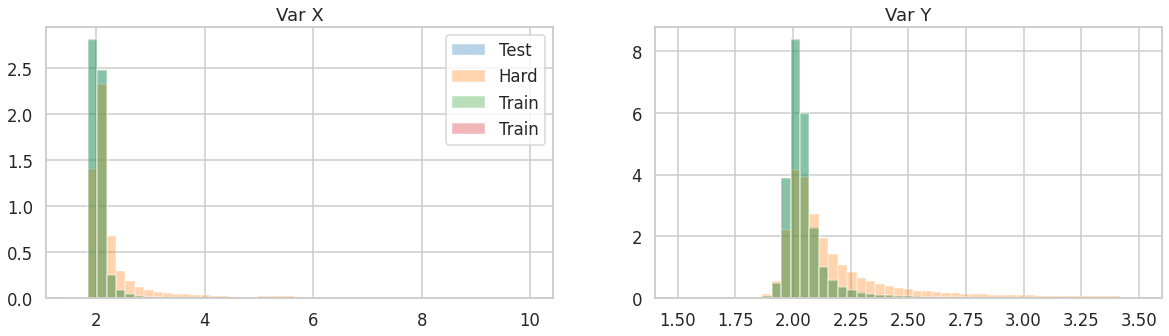

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_context('talk')
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.hist(test_variance.numpy()[..., 0], bins=np.linspace(1.5, 10, 50), density=True, alpha=0.33, label="Test")
    plt.hist(hard_variance.numpy()[..., 0], bins=np.linspace(1.5, 10, 50), density=True, alpha=0.33, label="Hard")
    plt.hist(train_variance.numpy()[..., 0], bins=np.linspace(1.5, 10, 50), density=True, alpha=0.33, label="Train")
    plt.hist(occl_variance.numpy()[..., 0], bins=np.linspace(1.5, 10, 50), density=True, alpha=0.33, label="Train")
    plt.title('Var X')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(test_variance.numpy()[..., 1], bins=np.linspace(1.5, 3.5, 50), density=True, alpha=0.33)
    plt.hist(hard_variance.numpy()[..., 1], bins=np.linspace(1.5, 3.5, 50), density=True, alpha=0.33)
    plt.hist(train_variance.numpy()[..., 1], bins=np.linspace(1.5, 3.5, 50), density=True, alpha=0.33)
    plt.title('Var Y')
    plt.show()

In [66]:
occl_variance.shape

torch.Size([123464, 2])